In [1]:
# Decision Tree
#A cloth manufacturing company is interested to know about the segment or attributes which causes high sale.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as snb

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor

In [5]:
company=pd.read_csv("C:\\Users\\deepa\\Downloads\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


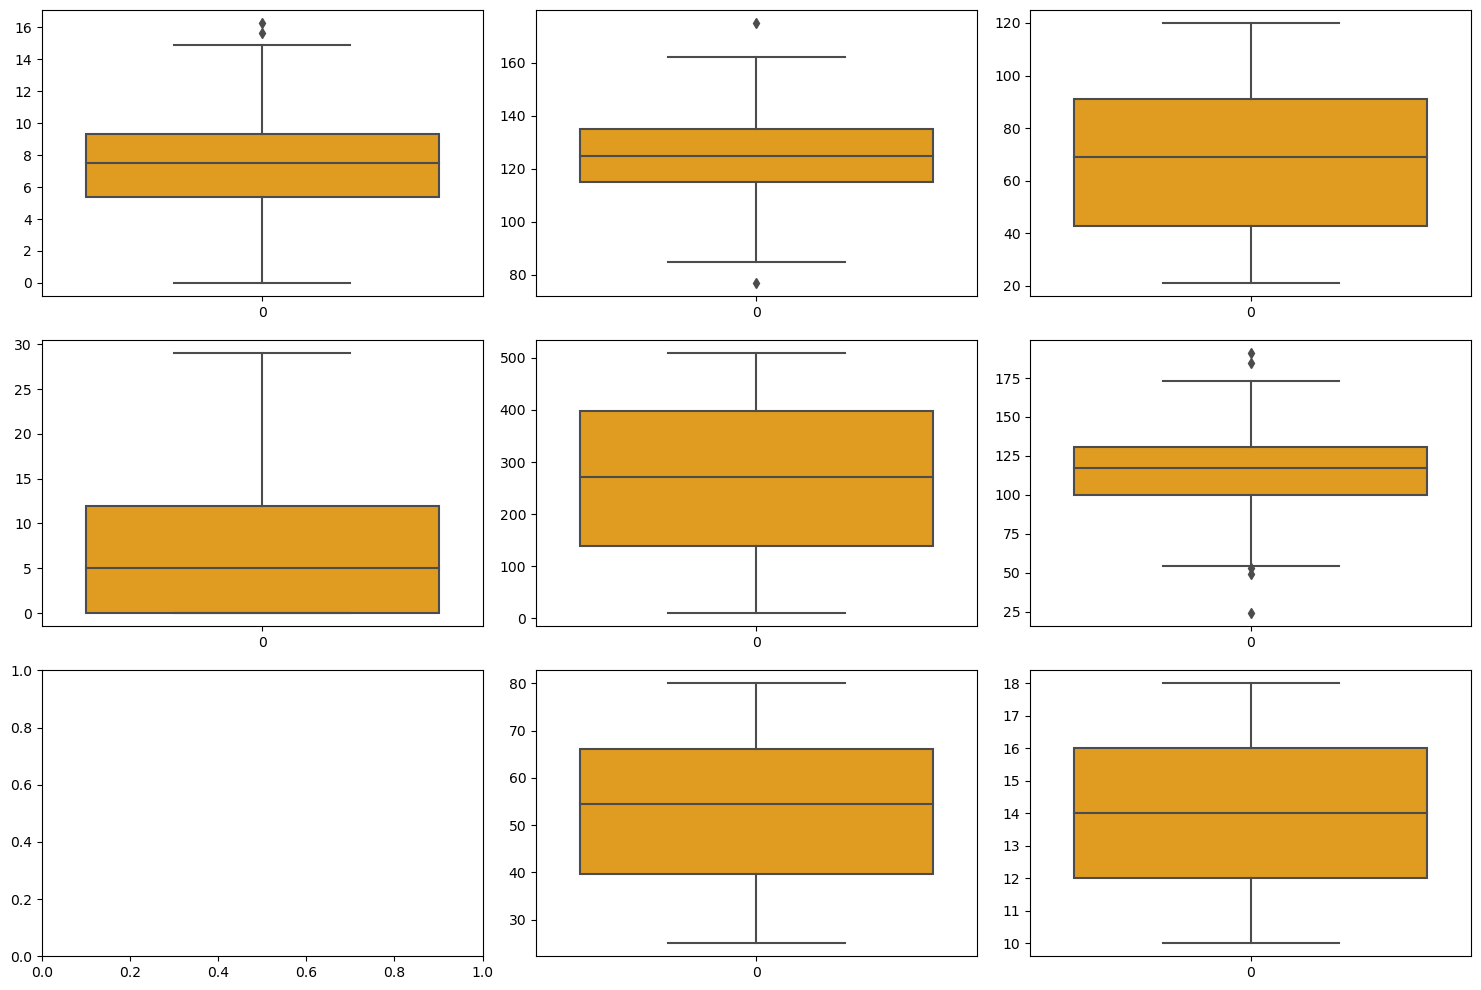

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
snb.boxplot(company.Sales, ax=ax[0,0],color='orange')
snb.boxplot(company.CompPrice, ax=ax[0,1],color='orange')
snb.boxplot(company.Income, ax=ax[0,2],color='orange')
snb.boxplot(company.Advertising, ax=ax[1,0],color='orange')
snb.boxplot(company.Population, ax=ax[1,1],color='orange')
snb.boxplot(company.Price, ax=ax[1,2],color='orange')
snb.boxplot(company.Age, ax=ax[2,1],color='orange')
snb.boxplot(company.Education, ax=ax[2,2],color='orange')

plt.tight_layout()
plt.show()

In [10]:
#Find the average sales and classifying the categories that are greater than the average sales value,
#as the fast moving product segment

In [11]:
company["sales"]=(company["Sales"]>7.49)

In [12]:
#Converting all the categorical variable to numerical values using Label encoding
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,True
1,11.22,111,48,16,260,83,1,65,10,1,1,True
2,10.06,113,35,10,269,80,2,59,12,1,1,True
3,7.40,117,100,4,466,97,2,55,14,1,1,False
4,4.15,141,64,3,340,128,0,38,13,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,True
396,6.14,139,23,3,37,120,2,55,11,0,1,False
397,7.41,162,26,12,368,159,2,40,18,1,1,False
398,5.94,100,79,7,284,95,0,50,12,1,1,False


In [13]:
#Dropping the sales column from the data, since it is the target variable, 'y'
company.drop(["Sales"],axis=1,inplace=True)

In [14]:
#Splitting the data into independent and target variables
x=company.iloc[:,0:10]
y=company.iloc[:,10]

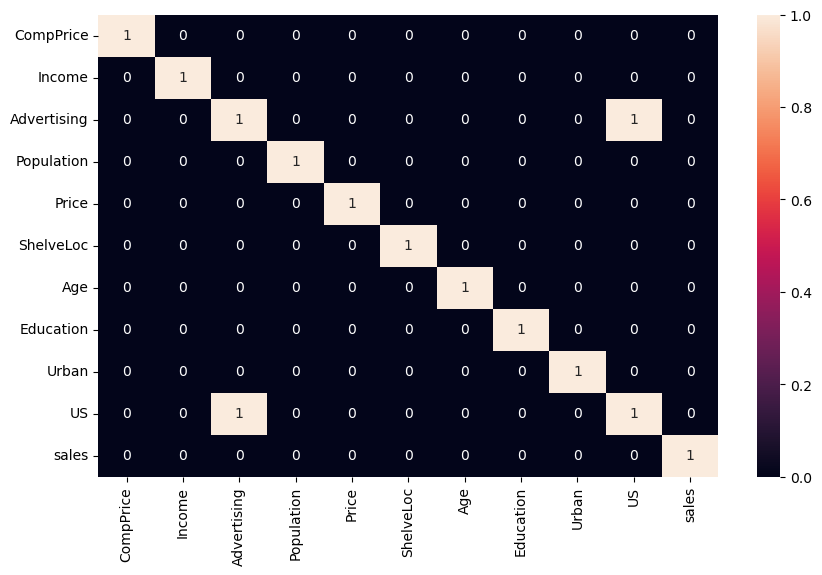

In [15]:
plt.figure(figsize=(10,6))
snb.heatmap(company.corr()>0.6, annot = True)
plt.show()

<Axes: >

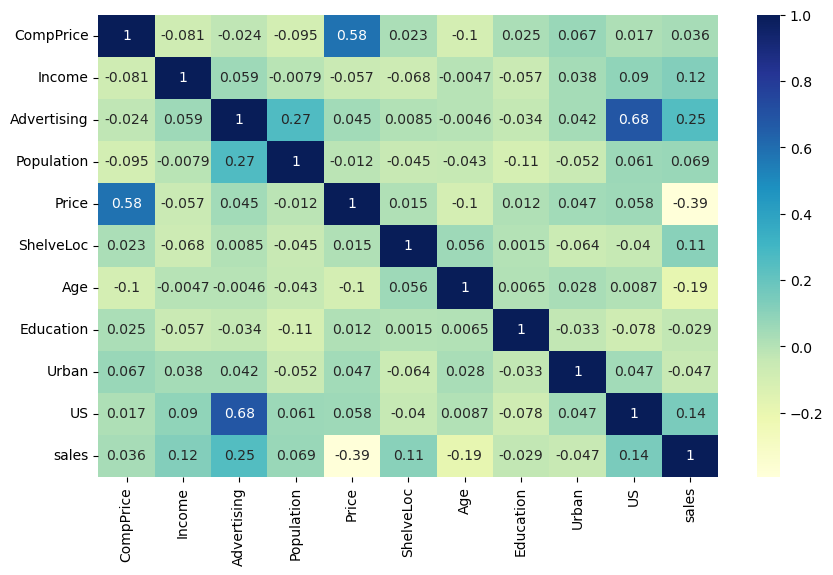

In [16]:
#Correlation matrix
plt.figure(figsize=(10,6))
snb.heatmap(company.corr(),cmap="YlGnBu",annot=True)

In [19]:
#Splitting data into training and testing data set, to check the confusion matrix betwixt the test and train data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [20]:
#Creating a Decision tree classifier model with a depth of 3 and fitting the data on the model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

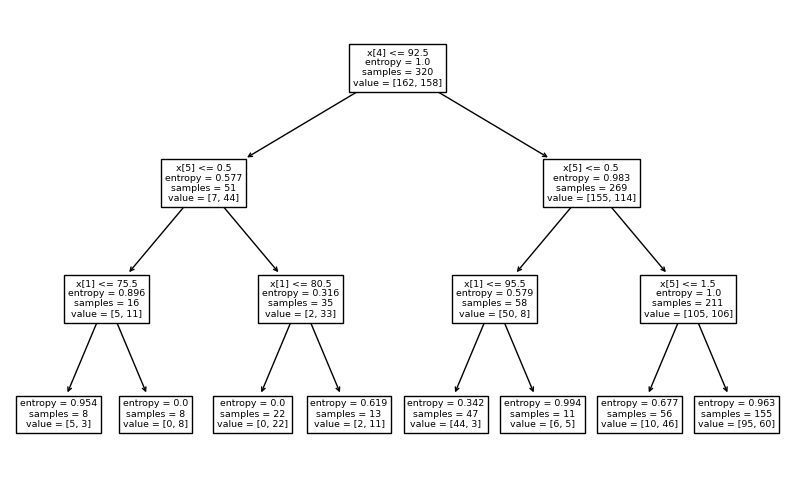

In [21]:
#Plot the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(model);

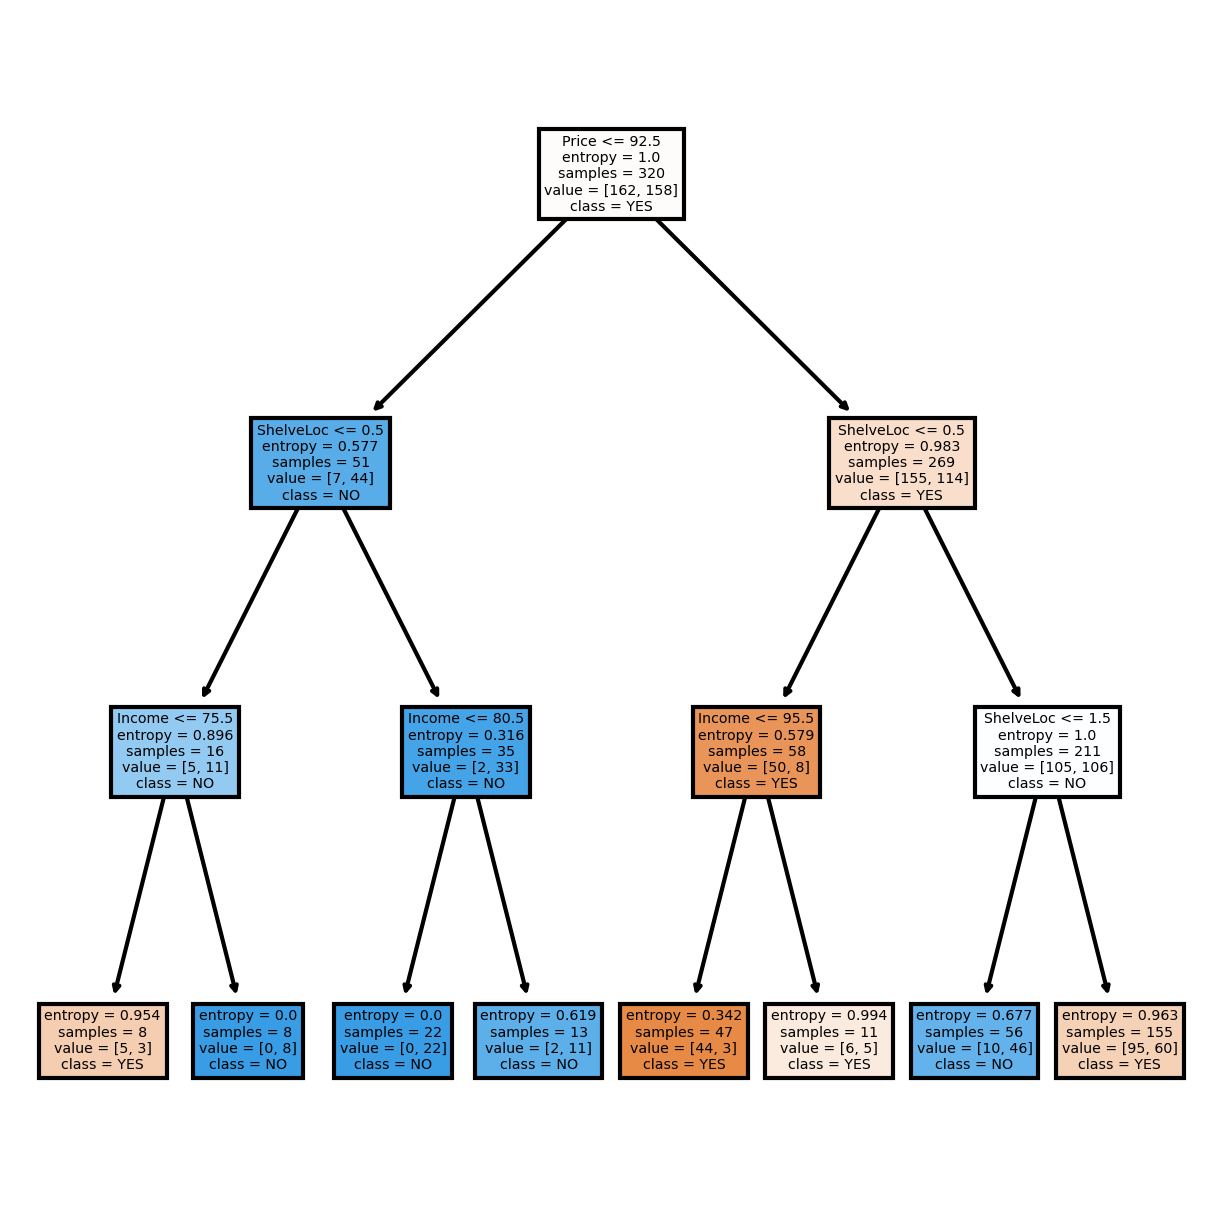

In [22]:
#Visualizing how the data is choosing the root node and how a decision tree classifier is built
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [23]:
#Checking the score for the training data
model.score(x_train, y_train)

0.740625

In [24]:
#Predicting on the test data using the built Decision tree classifier model
preds = model.predict(x_test)

In [25]:
#Identifying the accuracy of the predicted and the Y_test values
np.mean(preds==y_test)

0.6875

In [26]:
#Finding the score of the test data
model.score(x_test, y_test)

0.6875

In [27]:
model.feature_importances_

array([0.        , 0.18036831, 0.        , 0.        , 0.28929567,
       0.53033602, 0.        , 0.        , 0.        , 0.        ])

In [28]:
y_pred = preds
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.6875)

In [29]:
#Predict the probbilities of each of the predicted classes
model.predict_proba(x_test)

array([[0.93617021, 0.06382979],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.93617021, 0.06382979],
       [0.54545455, 0.45454545],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.17857143, 0.82142857],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.        , 1.        ],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.17857143, 0.82142857],
       [0.15384615, 0.84615385],
       [0.54545455, 0.45454545],
       [0.61290323, 0.38709677],
       [0.17857143, 0.82142857],
       [0.61290323, 0.38709677],
       [0.61290323, 0.38709677],
       [0.93617021, 0.06382979],
       [0.17857143, 0.82142857],
       [0.61290323, 0.38709677],
       [0.17857143, 0.82142857],
       [0.15384615, 0.84615385],
       [0.17857143, 0.82142857],
       [0.

In [30]:
#Evaluation metric - Confusion matrix
cm= confusion_matrix(y_test, y_pred) 
cm

array([[36,  3],
       [22, 19]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.6875')

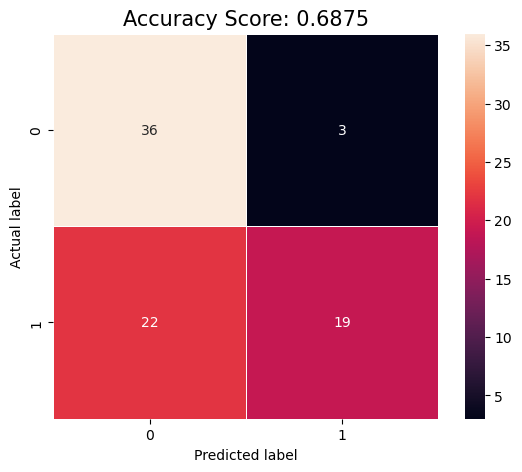

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
snb.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [33]:
print("Classification report - \n", classification_report(y_test,y_pred))


Classification report - 
               precision    recall  f1-score   support

       False       0.62      0.92      0.74        39
        True       0.86      0.46      0.60        41

    accuracy                           0.69        80
   macro avg       0.74      0.69      0.67        80
weighted avg       0.75      0.69      0.67        80



In [35]:
#Creating a for loop to identify the train and test accuracies of the prediction, 
#with the change in the max_depth feature of the decision tree classifier from 1 to 11
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [36]:
#Listing down the Accuracies in a Dataframe for different max depth classifiers
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.621875,0.6000
1,2,0.625000,0.6750
2,3,0.740625,0.6875
3,4,0.768750,0.7375
4,5,0.871875,0.7750
5,6,0.887500,0.7875
6,7,0.906250,0.7250
7,8,0.943750,0.7500
8,9,0.962500,0.8125
9,10,0.978125,0.7750


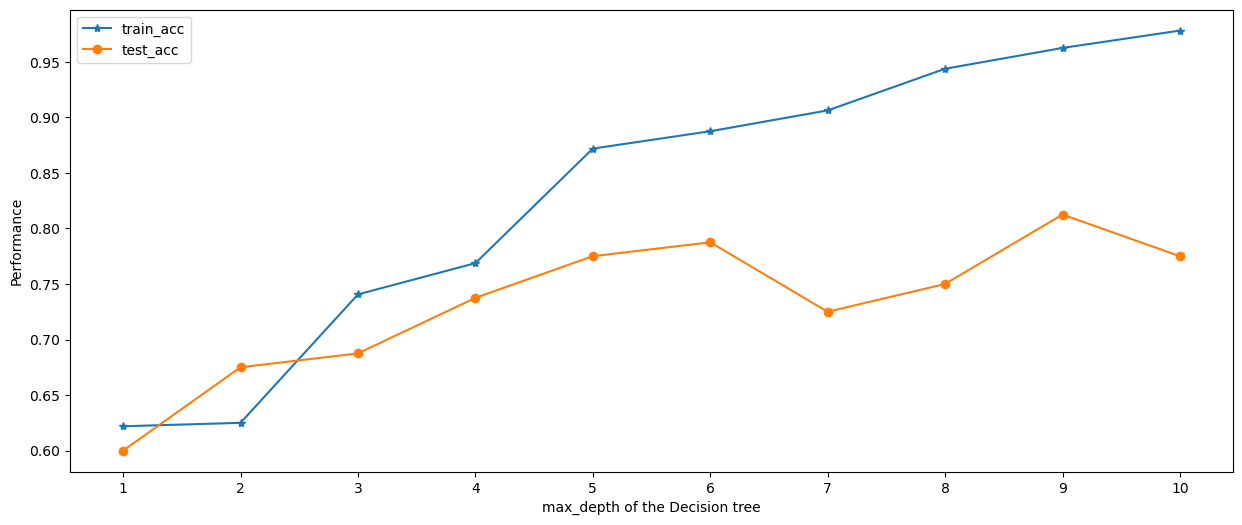

In [37]:
#Visualizing the accuracy graph, based on the max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = '*')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the Decision tree')
plt.ylabel('Performance')
plt.show()

In [38]:
#Splitting the test and train data with a different train-test split
array = company.values
X = array[:,0:10]
y = array[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [39]:
#Constructing a decision tree regressor model to predict the Salary classification
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
#Finding the accuracy of the test data
model.score(X_test,y_test)

-0.4821052631578948

In [ ]:
#When the maximum depth of the decision tree 9, the accuracy of the classsification algorithm gives 81.25%.